# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [16]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
import numpy as np
y = df.price.values
X = df.sqft_lot.values[:, np.newaxis]

y.shape

(21613,)

In [11]:
X.shape

(21613, 1)

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.5)

from sklearn.linear_model import LinearRegression
prediction = LinearRegression().fit(Xtrain, ytrain).predict(Xtest)

from sklearn.metrics import mean_squared_error, r2_score
#prediction = LinearRegression().predict(Xtest)
RMSE = (np.sqrt(mean_squared_error(ytest, prediction)))
Rsquared = r2_score(ytest, prediction)

print('root mean squared error:',RMSE)
print('R-squared: ',Rsquared)

root mean squared error: 360035.18462354277
R-squared:  0.010398545076663379


In [18]:
slope = LinearRegression().fit(Xtrain, ytrain).coef_[0]
intercept = LinearRegression().fit(Xtrain, ytrain).intercept_
print(slope, intercept)

0.7176554884804515 532031.8364077104


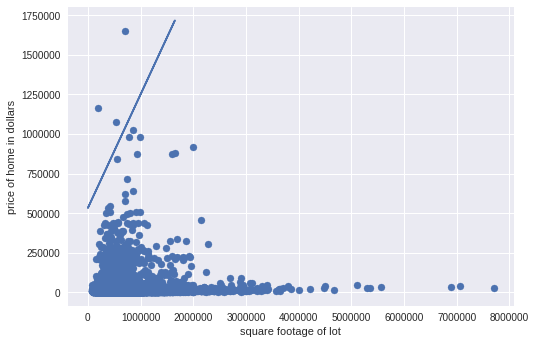

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df.price, df.sqft_lot)
line = [slope*x + intercept for x in X]
plt.plot(X, line)
plt.ylabel("price of home in dollars")
plt.xlabel("square footage of lot")
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [3]:
y = df.loc[:, ['price']].values
X = df.loc[:, ['sqft_lot','sqft_living']].values
y.shape

(21613, 1)

In [4]:
X.shape

(21613, 2)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.5)

from sklearn.linear_model import LinearRegression
prediction = LinearRegression().fit(Xtrain, ytrain).predict(Xtest)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
RMSE = (np.sqrt(mean_squared_error(ytest, prediction)))
Rsquared = r2_score(ytest, prediction)

print('root mean squared error:',RMSE)
print('R-squared: ',Rsquared)

root mean squared error: 258757.75731335024
R-squared:  0.48681228811722554


In [7]:
slope = LinearRegression().fit(Xtrain, ytrain).coef_[0]
intercept = LinearRegression().fit(Xtrain, ytrain).intercept_
print(slope, intercept)

[-2.34848465e-01  2.86587710e+02] [-51149.79270658]


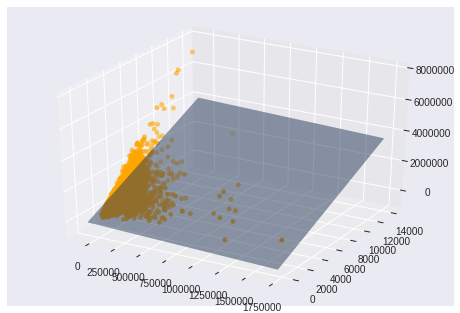

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.sqft_lot , df.sqft_living , df.price , c='orange')

x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = slope[0]*xx + slope[1]*yy + intercept[0]

plt3d = plt.gca(projection='3d')

plt3d.plot_surface(xx, yy, zz,alpha=0.5)

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
#for refreshing
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')

In [0]:
y = df.price
X = df.drop(['price', 'id', 'date'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.5)

from sklearn.linear_model import LinearRegression
prediction = LinearRegression().fit(Xtrain, ytrain).predict(Xtest)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
RMSE = (np.sqrt(mean_squared_error(ytest, prediction)))
Rsquared = r2_score(ytest, prediction)

print('root mean squared error:',RMSE)
print('R-squared: ',Rsquared)

root mean squared error: 197129.47918227763
R-squared:  0.6892418557218403


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
